## 아이리스 데이터
* 4개의 속성(자질): 꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비
* 3개의 레이블: 0:Setosa, 1:Versicolour, 2:Virginica

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
# 10개의 iris데이터 sample 보기
for i in range(10): 
    print(iris.data[i], iris.target[i])

(array([ 5.1,  3.5,  1.4,  0.2]), 0)
(array([ 4.9,  3. ,  1.4,  0.2]), 0)
(array([ 4.7,  3.2,  1.3,  0.2]), 0)
(array([ 4.6,  3.1,  1.5,  0.2]), 0)
(array([ 5. ,  3.6,  1.4,  0.2]), 0)
(array([ 5.4,  3.9,  1.7,  0.4]), 0)
(array([ 4.6,  3.4,  1.4,  0.3]), 0)
(array([ 5. ,  3.4,  1.5,  0.2]), 0)
(array([ 4.4,  2.9,  1.4,  0.2]), 0)
(array([ 4.9,  3.1,  1.5,  0.1]), 0)


## Loading the data

In [2]:
# feature matrix를 "X"에 저장
X = iris.data
# label vector를 "y"에 저장
y = iris.target

## Split train data and test data

In [3]:
from sklearn.model_selection import train_test_split

# train data와 test data로 나눈다
# train data는 80%, test data는 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# 분리된 데이터 형태 출력
print (len(X_train), len(X_test) )
print (len(y_train), len(y_test))

(120, 30)
(120, 30)


## Example training data

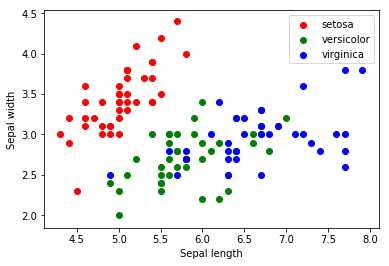

In [4]:
import matplotlib.pyplot as plt
colors = ['red', 'green', 'blue']
for i in range(len(colors)):
    # X_train에서 레이블이 i인 관측치에서 '꽃받침 길이'속성만을 추출하여 xs에 저장
    xs = X_train[:, 0][y_train==i]
    # X_train에서 레이블이 i인 관측치에서 '꽃받침 너비'속성만을 추출하여 ys에 저장
    ys = X_train[:, 1][y_train==i]
    plt.scatter(xs, ys, c=colors[i])

# 도표 설명    
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# k-nn Class import

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# 객체 생성

In [6]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [7]:
print (knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


### fit()을 통해 학습

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### predict() 예측

In [9]:
knn.predict( [[3, 5, 4, 2]])

array([2])

### 여러개 예측

In [10]:
X_new = [[3,5,4,2], [5,4,3,2]]
knn.predict(X_new)

array([2, 1])

## 모델 성능 측정 

* 정확도(accuracy) = (TP + TN) / m
* 정밀도(precision) = TP / (TP + FP)
* 재현율(recall) = TP / (TP + FN)
* f1-점수(f1-score) = 2 x 정밀도 x 재현율 / (정밀도 + 재현율)

In [11]:
y_pred = knn.predict(X_test)

from sklearn import metrics
print (metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.89      1.00      0.94         8
  virginica       1.00      0.93      0.96        14

avg / total       0.97      0.97      0.97        30



## 교차 검증

cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, ...)
* estimator: 사용할 모델
* X: 모델에 적용할 데이터
* y: supervised learning일 경우 예측을위한 정답데이터
* scoring: 성능지표
* cv: 데이터를 몇 개로 분리할지 결정

In [13]:
from sklearn.cross_validation import cross_val_score
# warning: sklearn version 0.20 => from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
accuracys = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

In [14]:
print(accuracys)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [15]:
print(accuracys.mean())

0.966666666667


# 프로그래밍 문제

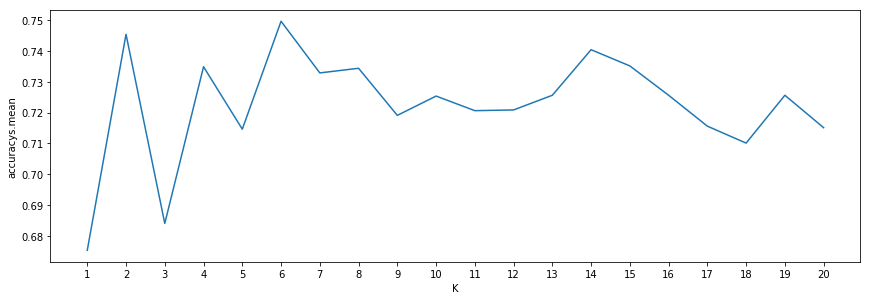

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

f=open("C:/german-symbolic.txt")

data=list([i for i in line.splitlines()]for line in f)

"""
def normal(list):
    M=max(list)
    m=min(list)
    for i in range(200):
        list[i]=(list[i]-m)/(M-m)
    return list
    정규화하면 성능이 떨어짐
"""  

# feature matrix를 "X"에 저장
X = [data[i][0][0:-2] for i in range(200)]
# label vector를 "y"에 저장
y = [data[i][0][-1] for i in range(200)]


X=np.array(list((X[i]).split(" ") for i in range (200)))

for i in range(20):
    if(X[:,i][i].startswith('A')):
        for j in range(200):
            X[:,i][j]=int((X[:,i][j])[-1:])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

k=range(21)
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    accuracys = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k[i]=accuracys.mean()

plt.subplots_adjust(left=None, bottom=None, right=2, top=1)

plt.xticks(range(20),range(1,21))
plt.xlabel('K')
plt.ylabel('accuracys.mean')
plt.plot(k[1:21])
plt.show()